In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [4]:
filepath='cps_85_wages.csv'
df=pd.read_csv(filepath,index_col=0)
print(df.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 534 entries, 8 to 16
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   SOUTH       534 non-null    object 
 1   SEX         534 non-null    object 
 2   EXPERIENCE  534 non-null    int64  
 3   UNION       534 non-null    object 
 4   WAGE        534 non-null    float64
 5   AGE         534 non-null    int64  
 6   RACE        534 non-null    object 
 7   OCCUPATION  534 non-null    object 
 8   SECTOR      534 non-null    object 
 9   MARR        534 non-null    object 
dtypes: float64(1), int64(2), object(7)
memory usage: 31.3+ KB
None


In [5]:
df.describe

<bound method NDFrame.describe of           SOUTH     SEX  EXPERIENCE       UNION   WAGE  AGE      RACE  \
EDUCATION                                                               
8            no  female          21  not_member   5.10   35  Hispanic   
9            no  female          42  not_member   4.95   57     White   
12           no    male           1  not_member   6.67   19     White   
12           no    male           4  not_member   4.00   22     White   
12           no    male          17  not_member   7.50   35     White   
...         ...     ...         ...         ...    ...  ...       ...   
18           no    male           5  not_member  11.36   29     White   
12           no  female          33  not_member   6.10   51     Other   
17           no  female          25      member  23.25   48     Other   
12          yes    male          13      member  19.88   31     White   
16           no    male          33  not_member  15.38   55     White   

             OCC

In [6]:
df.head

<bound method NDFrame.head of           SOUTH     SEX  EXPERIENCE       UNION   WAGE  AGE      RACE  \
EDUCATION                                                               
8            no  female          21  not_member   5.10   35  Hispanic   
9            no  female          42  not_member   4.95   57     White   
12           no    male           1  not_member   6.67   19     White   
12           no    male           4  not_member   4.00   22     White   
12           no    male          17  not_member   7.50   35     White   
...         ...     ...         ...         ...    ...  ...       ...   
18           no    male           5  not_member  11.36   29     White   
12           no  female          33  not_member   6.10   51     Other   
17           no  female          25      member  23.25   48     Other   
12          yes    male          13      member  19.88   31     White   
16           no    male          33  not_member  15.38   55     White   

             OCCUPAT

<AxesSubplot: xlabel='AGE', ylabel='EXPERIENCE'>

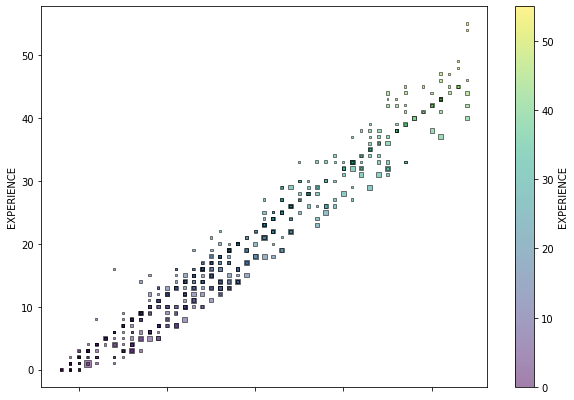

In [7]:
df.plot(kind='scatter',x='AGE',y='EXPERIENCE',alpha=0.5,c='EXPERIENCE',cmap='viridis',figsize=(10,7), marker='s',s='WAGE',edgecolor='black')

In [11]:
df.pivot_table(values='AGE',index='SECTOR',aggfunc=['mean','max','min','median'] )

,mean,max,min,median
,AGE,AGE,AGE,AGE
SECTOR,,,,
Construction,40.083333,61,20,42.5
Manufacturing,37.838384,64,19,35.0
Other,36.401460,64,18,35.0


In [12]:
df.pivot_table(values='AGE',index='SECTOR',columns='SEX')

SEX,female,male
SECTOR,,
Construction,57.500000,38.500000
Manufacturing,38.666667,37.300000
Other,37.490196,35.328502


<AxesSubplot: xlabel='SECTOR'>

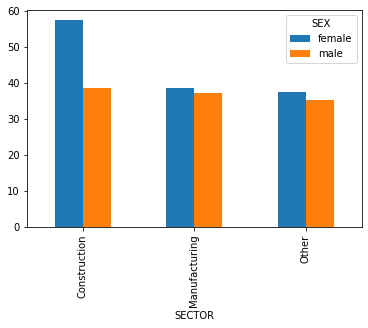

In [15]:
df.pivot_table(values='AGE',index='SECTOR',columns='SEX').plot(kind='bar')

<AxesSubplot: xlabel='SECTOR'>

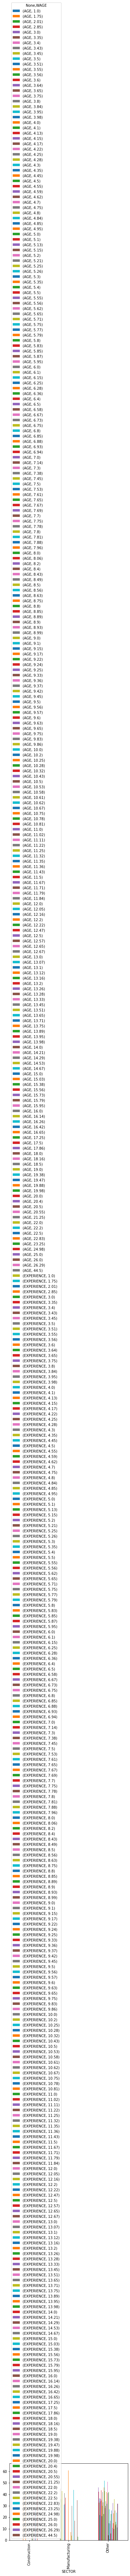

In [18]:
df.pivot_table(index='SECTOR',columns='WAGE').plot(kind='bar')

# filtring data using boolean filtering

In [19]:
df['SECTOR']=='manufacturing'

EDUCATION
8     False
9     False
12    False
12    False
12    False
      ...  
18    False
12    False
17    False
12    False
16    False
Name: SECTOR, Length: 534, dtype: bool

In [22]:
df[df['SECTOR']=='manufacturing']

,SOUTH,SEX,EXPERIENCE,UNION,WAGE,AGE,RACE,OCCUPATION,SECTOR,MARR
EDUCATION,,,,,,,,,,


In [23]:
df[~(df['SECTOR']=='manufacturing')]

,SOUTH,SEX,EXPERIENCE,UNION,WAGE,AGE,RACE,OCCUPATION,SECTOR,MARR
EDUCATION,,,,,,,,,,
8,no,female,21,not_member,5.10,35,Hispanic,Other,Manufacturing,Married
9,no,female,42,not_member,4.95,57,White,Other,Manufacturing,Married
12,no,male,1,not_member,6.67,19,White,Other,Manufacturing,Unmarried
12,no,male,4,not_member,4.00,22,White,Other,Other,Unmarried
12,no,male,17,not_member,7.50,35,White,Other,Other,Married
...,...,...,...,...,...,...,...,...,...,...
18,no,male,5,not_member,11.36,29,White,Professional,Other,Unmarried
12,no,female,33,not_member,6.10,51,Other,Professional,Other,Married
17,no,female,25,member,23.25,48,Other,Professional,Other,Married


In [24]:
explt10=df['EXPERIENCE']<=10
df[explt10]

,SOUTH,SEX,EXPERIENCE,UNION,WAGE,AGE,RACE,OCCUPATION,SECTOR,MARR
EDUCATION,,,,,,,,,,
12,no,male,1,not_member,6.67,19,White,Other,Manufacturing,Unmarried
12,no,male,4,not_member,4.00,22,White,Other,Other,Unmarried
13,no,male,9,member,13.07,28,White,Other,Other,Unmarried
12,no,male,9,not_member,19.47,27,White,Other,Other,Unmarried
12,no,male,9,not_member,8.75,27,White,Other,Other,Unmarried
...,...,...,...,...,...,...,...,...,...,...
16,no,male,10,member,7.50,32,White,Professional,Other,Married
17,yes,male,2,not_member,7.00,25,White,Professional,Other,Married
15,no,male,10,not_member,12.50,31,White,Professional,Other,Unmarried


<AxesSubplot: ylabel='Frequency'>

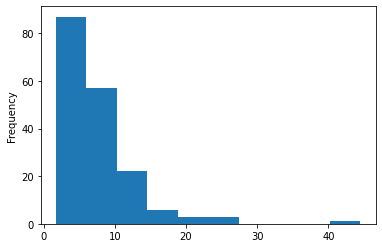

In [25]:
df[explt10].WAGE.plot(kind='hist')

<AxesSubplot: >

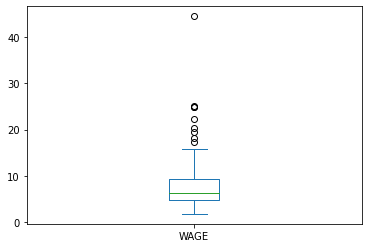

In [29]:
df[explt10].plot(kind='box',x='EXPERIENCE',y='WAGE')

# sorting

In [31]:
df.sort_values(by='AGE',inplace=True)# inmportant is inplace

In [35]:
df.sort_values(by=['RACE','WAGE'],ascending=[False,True],inplace=True)

## group by

In [39]:
#pivot table is updated version of group by
df.groupby('OCCUPATION')['EXPERIENCE'].mean()

OCCUPATION
Clerical        17.577320
Management      18.072727
Other           18.064103
Professional    15.457143
Sales           18.447368
Service         20.192771
Name: EXPERIENCE, dtype: float64

In [40]:
df.groupby('OCCUPATION')['EXPERIENCE'].agg(['mean','min','max','median','std'])

,mean,min,max,median,std
OCCUPATION,,,,,
Clerical,17.577320,0,45,15.0,12.124214
Management,18.072727,1,42,15.0,11.375501
Other,18.064103,0,55,15.0,12.448438
Professional,15.457143,0,42,13.0,10.275090
Sales,18.447368,0,45,15.5,13.492135
Service,20.192771,0,54,17.0,14.718876


In [41]:
df.groupby('OCCUPATION')['EXPERIENCE','WAGE'].mean()

C:\Users\Shalini Shukla\AppData\Local\Temp\ipykernel_12016\3989577191.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('OCCUPATION')['EXPERIENCE','WAGE'].mean()


,EXPERIENCE,WAGE
OCCUPATION,,
Clerical,17.577320,7.422577
Management,18.072727,12.704000
Other,18.064103,8.426474
Professional,15.457143,11.947429
Sales,18.447368,7.592632
Service,20.192771,6.537470


C:\Users\Shalini Shukla\AppData\Local\Temp\ipykernel_12016\255127886.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('OCCUPATION')['EXPERIENCE','WAGE'].mean().plot(kind='bar')


<AxesSubplot: xlabel='OCCUPATION'>

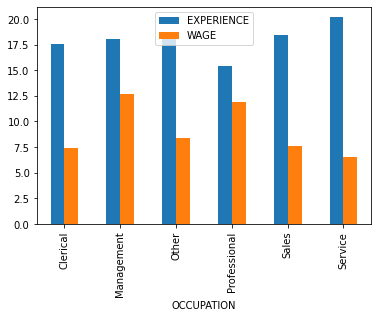

In [43]:
df.groupby('OCCUPATION')['EXPERIENCE','WAGE'].mean().plot(kind='bar')#.plot()

C:\Users\Shalini Shukla\AppData\Local\Temp\ipykernel_12016\2347050217.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('OCCUPATION')['EXPERIENCE','WAGE'].mean().plot(kind='box')


<AxesSubplot: >

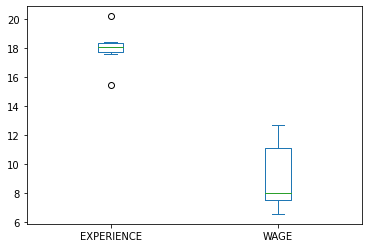

In [44]:
df.groupby('OCCUPATION')['EXPERIENCE','WAGE'].mean().plot(kind='box')